In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shivamb/netflix-shows
!unzip netflix-shows

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
netflix-shows.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  netflix-shows.zip
replace netflix_titles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: netflix_titles.csv      


In [4]:
import pandas as pd

df = pd.read_csv('/content/netflix_titles.csv')

print(df.columns)


selected_columns = ['title', 'listed_in', 'release_year', 'country', 'rating', 'duration']  # Adjust based on actual column names
df = df[selected_columns]

df.head()


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


,title,listed_in,release_year,country,rating,duration
0,Dick Johnson Is Dead,Documentaries,2020,United States,PG-13,90 min
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",2021,South Africa,TV-MA,2 Seasons
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",2021,NaN,TV-MA,1 Season
3,Jailbirds New Orleans,"Docuseries, Reality TV",2021,NaN,TV-MA,1 Season
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",2021,India,TV-MA,2 Seasons


In [8]:
# Step 2: Data Preprocessing

print(df.isnull().sum())

df['rating'] = df['rating'].fillna('Not Rated')

df = df.dropna(subset=['release_year', 'country'])



title           0
listed_in       0
release_year    0
country         0
rating          0
duration        3
dtype: int64


In [10]:
# Step 3: Feature Engineering

import datetime
current_year = datetime.datetime.now().year
df['content_age'] = current_year - df['release_year']

df_encoded = pd.get_dummies(df, columns=['listed_in', 'country'], drop_first=True)

df_encoded.head()


,title,release_year,rating,duration,content_age,"listed_in_Action & Adventure, Anime Features, Children & Family Movies","listed_in_Action & Adventure, Anime Features, Classic Movies","listed_in_Action & Adventure, Anime Features, Horror Movies","listed_in_Action & Adventure, Anime Features, International Movies","listed_in_Action & Adventure, Anime Features, Sci-Fi & Fantasy",...,"country_Uruguay, Argentina, Germany, Spain","country_Uruguay, Argentina, Spain","country_Uruguay, Germany","country_Uruguay, Guatemala","country_Uruguay, Spain, Mexico",country_Venezuela,"country_Venezuela, Colombia",country_Vietnam,country_West Germany,country_Zimbabwe
0,Dick Johnson Is Dead,2020,PG-13,90 min,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Blood & Water,2021,TV-MA,2 Seasons,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Kota Factory,2021,TV-MA,2 Seasons,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,Sankofa,1993,TV-MA,125 min,31,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,The Great British Baking Show,2021,TV-14,9 Seasons,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


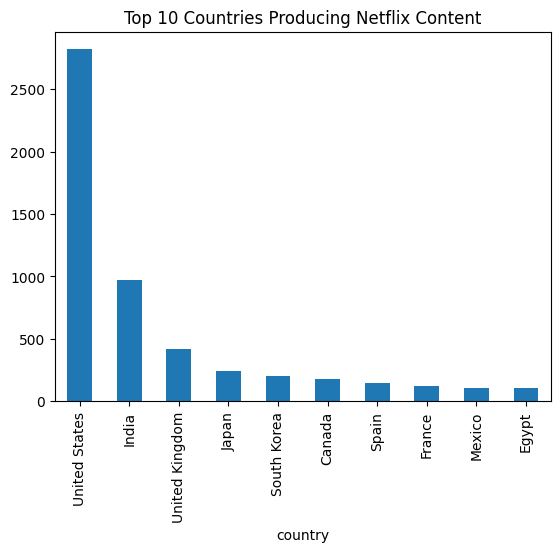

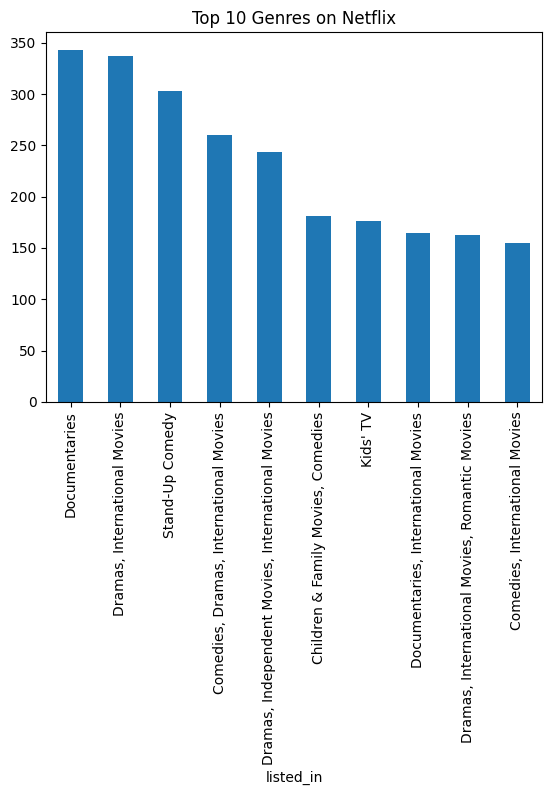

In [12]:
# Step 4: Data Mining

content_by_country = df.groupby('country')['title'].count().sort_values(ascending=False)
content_by_genre = df.groupby('listed_in')['title'].count().sort_values(ascending=False)

import matplotlib.pyplot as plt

content_by_country.head(10).plot(kind='bar', title="Top 10 Countries Producing Netflix Content")
plt.show()

content_by_genre.head(10).plot(kind='bar', title="Top 10 Genres on Netflix")
plt.show()
